# Capstone Project 1:  Data Story

Import the libraries that will be needed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Set some options to make the data a little easier to read.

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

Read the dataset that I have already cleaned.

In [3]:
df = pd.read_csv('Data/Loan_Clean.csv',low_memory=False,index_col=0, 
                parse_dates=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 
                               'debt_settlement_flag_date', 'settlement_date'])

C:\Users\Scott\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Take a peek at the data to make sure it looks correct.

In [4]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util_pct,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,meets_credit_policy
0,5000.000,5000.000,4975.000,36.000,0.106,162.870,B,B2,NaN,10.000,RENT,24000.000,Verified,2011-12-01,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0.000,1985-01-01,1.000,nan,nan,3.000,0.000,13648.000,0.837,9.000,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,2015-01-01,171.620,NaT,2019-05-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,N,NaT,NaN,NaT,nan,nan,nan,True
1,2500.000,2500.000,2500.000,60.000,0.153,59.830,C,C4,Ryder,0.500,RENT,30000.000,Source Verified,2011-12-01,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0.000,1999-04-01,5.000,nan,nan,3.000,0.000,1687.000,0.094,4.000,f,0.000,0.000,1014.530,1014.530,456.460,435.170,0.000,122.900,1.110,2013-04-01,119.660,NaT,2016-10-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,N,NaT,NaN,NaT,nan,nan,nan,True
2,2400.000,2400.000,2400.000,36.000,0.160,84.330,C,C5,NaN,10.000,RENT,12252.000,Not Verified,2011-12-01,Fully Paid,n,NaN,small_business,real estate business,606xx,

## The goal is to determine what loans have the greatest potential to end up as Default or Charged Off

If a borrower has completely repaid their loan then the staus changes to Fully Paid.  

Sometimes borrowers are not able to repay their loans.  When a borrower cannot make a payment for an extended period of time then the loan status changes to Default.  When the lender thinks there is not a reasonable expectation that the borrower will repay the loan then the status changes to Charged Off.  

## Pull out the relevant data for loans with a status of Default, Charged Off, and Fully Paid

Loans that are still being paid off still have the ability to become delinquint or fully paid.  We will get rid of those in order to focus on the relevant data.  

In [5]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Current',
       'In Grace Period', 'Late (16-30 days)', 'Default'], dtype=object)

In [6]:
df = df[(df['loan_status']=='Default')|(df['loan_status']=='Fully Paid')
        |(df['loan_status']=='Charged Off')].reset_index(drop=True)
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Default'], dtype=object)

## Who is taking the loans and why are they taking them out?

We can take a look at the employment titles for people taking the loans.  It looks like lots of teachers, managers, and nurses.  

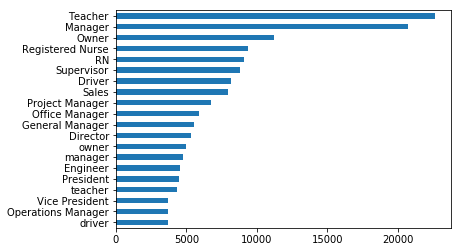

In [22]:
df['emp_title'].value_counts()[:20].plot(kind='barh')
plt.gca().invert_yaxis()

And the loans are taken out overwhelmingly for debt consolidation.  

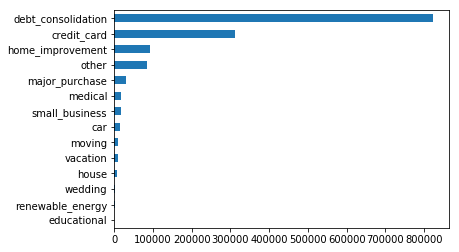

In [26]:
df['purpose'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()

## How big are these loans?

The loans range in size from 500 dollars up to 40,000 dollars with most being around 10,000 dollars.

Text(0.5, 0, 'Loan Amount ($)')

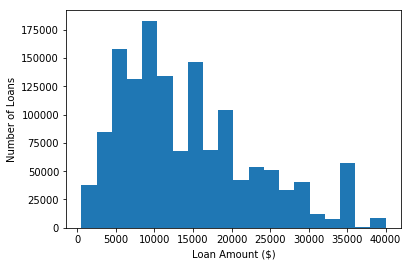

In [27]:
plt.hist(df['loan_amnt'],bins=20)
plt.ylabel('Number of Loans')
plt.xlabel('Loan Amount ($)')

## When did these loans take place?

The data that we are using includes loans that started anywhere between June of 2007 all the way up to the end of 2018. 

(array([   603.,   1652.,   1312.,   2786.,   5008.,   8118.,  10563.,
         15095.,  25967.,  47504.,  68239., 110271., 150218., 173558.,
        243674., 215513., 130039., 111516.,  70671.,  30415.]),
 array([732828.  , 733038.05, 733248.1 , 733458.15, 733668.2 , 733878.25,
        734088.3 , 734298.35, 734508.4 , 734718.45, 734928.5 , 735138.55,
        735348.6 , 735558.65, 735768.7 , 735978.75, 736188.8 , 736398.85,
        736608.9 , 736818.95, 737029.  ]),
 <a list of 20 Patch objects>)

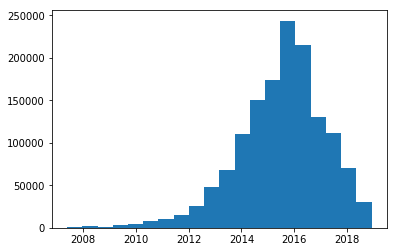

In [28]:
plt.hist(df['issue_d'],bins=20)

## What percent of the loans are in default or charged off?

Let's look at a pie chart to see what percentage is Default, Charged Off, and Fully Paid

In [29]:
labels = ['Default','Charged Off','Fully Paid']

In [30]:
sizes = [df[df['loan_status']=='Default'].shape[0],df[df['loan_status']=='Charged Off'].shape[0],
         df[df['loan_status']=='Fully Paid'].shape[0]]

In [31]:
colors = ['0.1','0.5','0.9']

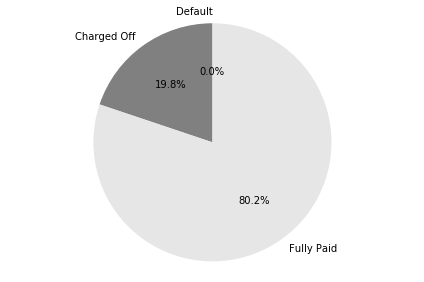

In [32]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')
plt.tight_layout()
plt.show()

### We want to predict which loans are most likely to go into Default or be Charged Off.

### Some indicators are expected

There are pieces of data that a reasonable person would expect to make it more difficult to pay back a loan.  Two that immediately came to mind are the size of the loan (loan amount), the size of the payments that need to be made (installment), and the annual income of the borrower.  

Below there is a strip plot of the Loan Amount for Fully Paid, Charge Off, and Default loan status.  The Fully Paid strip plot is "darker" because there are more of them, but the overall shape doesn't seem to be that different from the Charged Off loans.  

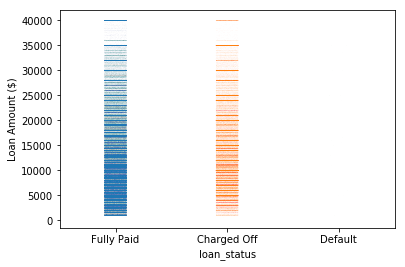

In [33]:
sns.stripplot(x='loan_status', y='loan_amnt', data=df, size=0.1, jitter=True)
plt.ylabel('Loan Amount ($)')
plt.show()

With the violin plot of the same data it is easier to see that the Charged Off loans are for larger loan amounts, but the difference is subtle.  

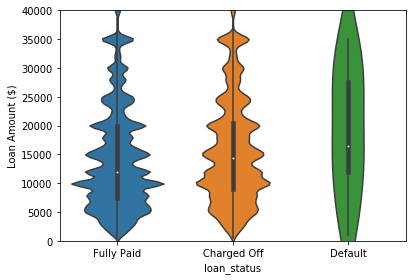

In [34]:
sns.violinplot(x='loan_status', y='loan_amnt', data=df)
plt.ylabel('Loan Amount ($)')
plt.tight_layout()
plt.ylim(0, 40000)
plt.show()

The violin plot of the Annual Income shows, as expected, that the lower annual incomes seem to have a higher likelihood of becoming Charged Off.  Again, the differeneces are subtle but they are there.  

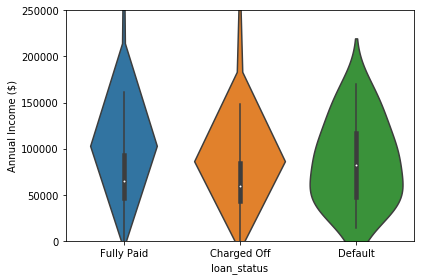

In [35]:
sns.violinplot(x='loan_status', y='annual_inc', data=df)
plt.ylabel('Annual Income ($)')
plt.ylim(0, 250000)
plt.tight_layout()
plt.show()

And it is the same for installments.  As expected, Charged Off loans have a larger installment indicating a correlation.  

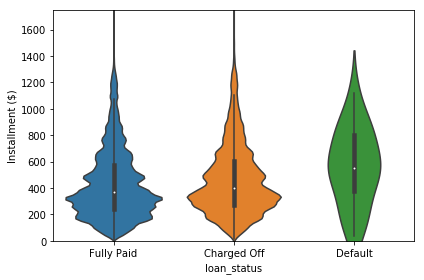

In [36]:
sns.violinplot(x='loan_status', y='installment', data=df)
plt.ylabel('Installment ($)')
plt.ylim(0, 1750)
plt.tight_layout()
plt.show()

The differences are not as glaring as a person might expect.  If we have a scatter plot of Annual Income vs Installment most would expect the Charged Off loans to crowded in the high installment and low salary region of the graph.  However, when viewing the below scatter plot, the differences are not a marked as expected.   

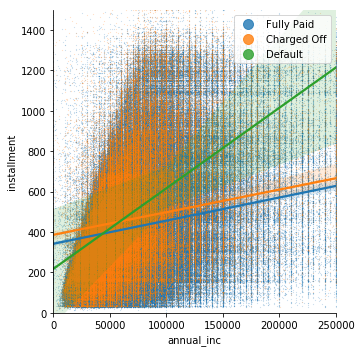

In [37]:
sns.lmplot(x='annual_inc', y='installment', data=df, hue='loan_status', legend=False, scatter_kws={"s": 0.01})
plt.legend(markerscale=100)
plt.xlim(0, 250000)
plt.ylim(0, 1500)
plt.show()

### Some were expected but not as obvious

Debt to income ratio might not jump to mind when thinking about risk of Default, but it makes sense.  

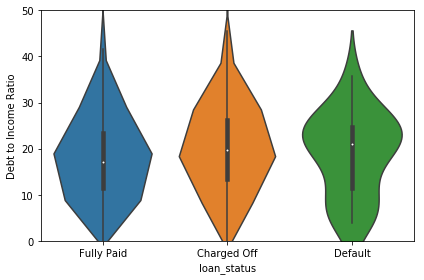

In [39]:
sns.violinplot(x='loan_status', y='dti', data=df)
plt.ylabel('Debt to Income Ratio')
plt.ylim(0, 50)
plt.tight_layout()
plt.show()

Same with the ratio of balance to credit limit on all trades.

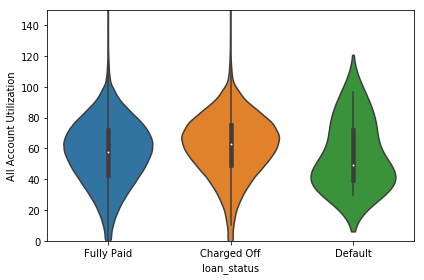

In [40]:
sns.violinplot(x='loan_status', y='all_util', data=df)
plt.ylabel('All Account Utilization')
plt.ylim(0, 150)
plt.tight_layout()
plt.show()

And the same again with percentage of all bankcard accounts > 75% of limit.

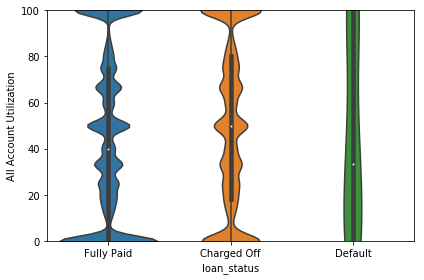

In [41]:
sns.violinplot(x='loan_status', y='percent_bc_gt_75', data=df)
plt.ylabel('All Account Utilization')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

### Some were subtle but still strong indicators

The secondary application inquiries in the last 6 months and the secondary applicant revolving credit utilization seem to be good indicators.  

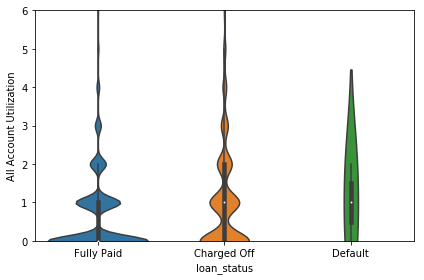

In [42]:
sns.violinplot(x='loan_status', y='sec_app_inq_last_6mths', data=df)
plt.ylabel('All Account Utilization')
plt.ylim(0, 6)
plt.tight_layout()
plt.show()

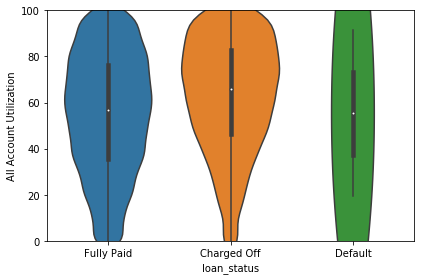

In [43]:
sns.violinplot(x='loan_status', y='sec_app_revol_util', data=df)
plt.ylabel('All Account Utilization')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

## Some pieces of data are probably excellent indicators of a loan going bad, but they are such strong indicators that most people who have them can't get a loan in the first place.  

People who have had a Charge Off within the last 12 months are incredibly likely to have another one.  However, they are probably also unlikely to be able to get another loan.  When viewing the data there isn't much to see.

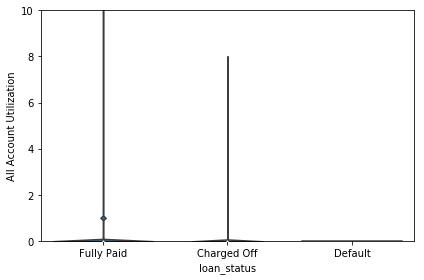

In [44]:
sns.violinplot(x='loan_status', y='chargeoff_within_12_mths', data=df)
plt.ylabel('All Account Utilization')
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

## Some data helps paint a picture

Hardships are when a borrower has an event that will make it more difficult to repay their debt.  It only happens in a small percent of loans.  However, one of the most common categories of hardship loans is Unemployment.  This helped re-frame how I thought about predicting a loan Default.  This is trying to predict when things are likely to go bad for a borrower.  I would imagine the vast majority of borrowers intend to pay back their loan, but due to some circumstance cannot make it happen.  

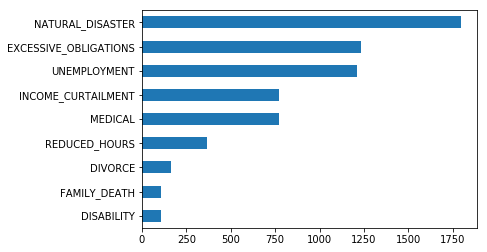

In [46]:
df['hardship_reason'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()

## Some data was surprising

Some data didn't go the direction that a person might expect.  Term is the number of payments on a loan expressed in months.  One might expect that if a term is shorter, this could cause the payments to be higher and cause an increase in Default loans.  However, the data showed a different story.  Keeping the above lesson in mind about unemployment, a longer term could give more opportunity for things to go wrong.  This thought better aligns with the data.  

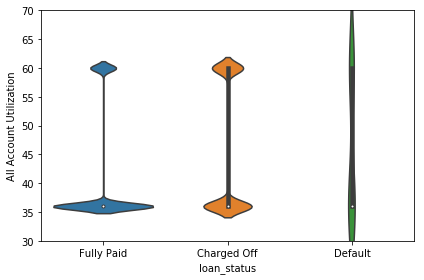

In [47]:
sns.violinplot(x='loan_status', y='term_months', data=df)
plt.ylabel('All Account Utilization')
plt.ylim(30, 70)
plt.tight_layout()
plt.show()